In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = sm.datasets.engel.load_pandas().data

In [3]:
data.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


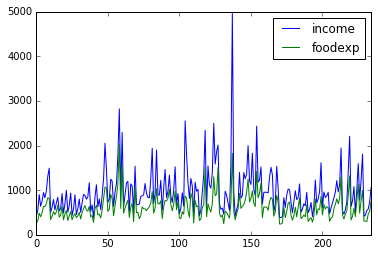

In [4]:
data.plot()

In [5]:
mod = smf.quantreg('foodexp ~ income', data)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                foodexp   Pseudo R-squared:               0.6206
Model:                       QuantReg   Bandwidth:                       64.51
Method:                 Least Squares   Sparsity:                        209.3
Date:                Thu, 28 Mar 2019   No. Observations:                  235
Time:                        12:38:49   Df Residuals:                      233
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4823     14.634      5.568      0.000      52.649     110.315
income         0.5602      0.013     42.516      0.000       0.534       0.586

The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


In [7]:
quantiles = np.arange(.05, .96, .1)

def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['income']] + \
            res.conf_int().loc['income'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

ols = smf.ols('foodexp ~ income', data).fit()
ols_ci = ols.conf_int().loc['income'].tolist()
print(ols_ci)
ols = dict(a = ols.params['Intercept'],
           b = ols.params['income'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

[0.4568738130184234, 0.5134830343354239]
      q           a         b        lb        ub
0  0.05  124.880096  0.343361  0.268632  0.418090
1  0.15  111.693659  0.423708  0.382780  0.464636
2  0.25   95.483539  0.474103  0.439900  0.508306
3  0.35  105.841294  0.488901  0.457759  0.520043
4  0.45   81.083647  0.552428  0.525021  0.579835
5  0.55   89.661370  0.565601  0.540955  0.590247
6  0.65   74.033435  0.604576  0.582169  0.626982
7  0.75   62.396584  0.644014  0.622411  0.665617
8  0.85   52.272216  0.677603  0.657383  0.697823
9  0.95   64.103964  0.709069  0.687831  0.730306
{'lb': 0.4568738130184234, 'ub': 0.5134830343354239, 'b': 0.48517842367692365, 'a': 147.47538852370565}


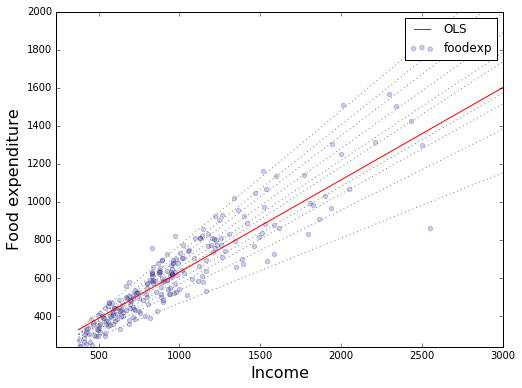

In [16]:
x = np.arange(data.income.min(), data.income.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')
    
y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(data.income, data.foodexp, alpha=.2)
ax.set_xlim((240, 3000))
ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel('Income', fontsize=16)
ax.set_ylabel('Food expenditure', fontsize=16);



Populating the interactive namespace from numpy and matplotlib


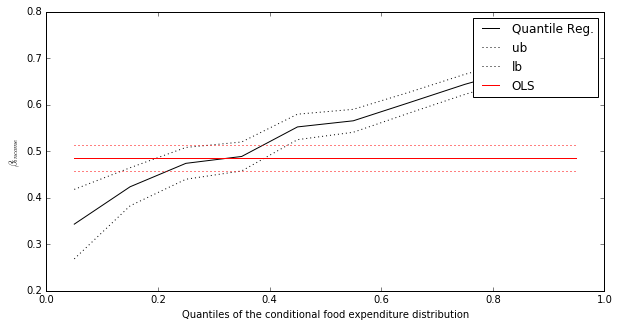

In [20]:
# necessary for the plot to appear in a Jupyter
%matplotlib inline
# Control the default size of figures in this Jupyter 
%pylab inline
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)


n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'$\beta_{income}$')
plt.xlabel('Quantiles of the conditional food expenditure distribution')
plt.legend()
plt.show()

In [ ]:
## Plot the changes in the quantile coefficients plt.figure(6) params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'],          title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])

## LINEAR REGRESSION VS QUANTILE REGRESSION

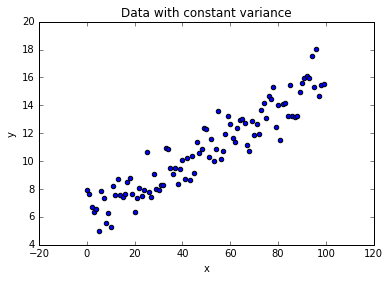

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 

## Generate some data with constant variance /noise
x = np.arange(100).reshape(100,1)
intercept_ = 6
slope_ = 0.1
## non constant error
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = 1)
## Regression equation
y = intercept_ + slope_ * x + error_

plt.figure(1)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with constant variance")

Mean squared error: 1.13
Variance score: 0.88


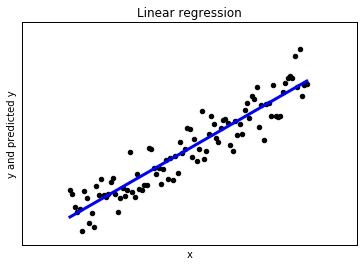

In [11]:
## Let us do a least square regression on the above dataset
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(x, y)

y_pred1 = model1.predict(x)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x, y)))

## Plot the regression
plt.figure(2)
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred1, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Linear regression")

#### WHY WE NEED A QUANTILE REGRESSION

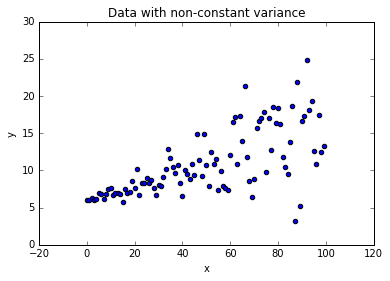

In [12]:
## Generate some data with non-constant variance
x_ = np.arange(100).reshape(100,1)
intercept_ = 6
slope_ = 0.1
## Non constant variance
var_ = 0.1 + 0.05 * x_
## non constant error
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = var_)
## Regression equation
y_ = intercept_ + slope_ * x + error_

plt.figure(3)
plt.scatter(x_, y_)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with non-constant variance")

Mean squared error: 10.52
Variance score: 0.45


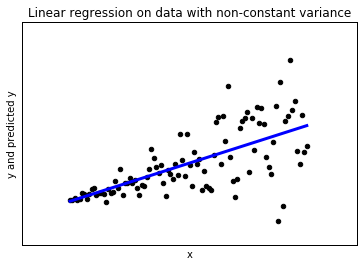

In [13]:
## Try to fit a linear regression
model2 = LinearRegression(fit_intercept = True, normalize = False)
model2.fit(x_, y_)

y_pred2 = model2.predict(x_)

print
print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred2 - y_) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x_, y_)))

## Plot the regression
plt.figure(4)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Linear regression on data with non-constant variance")

In [14]:
## Quantile regression for the median, 0.5th quantile
import pandas as pd 
data = pd.DataFrame(data = np.hstack([x_, y_]), columns = ["x", "y"])
print(data.head())

import statsmodels.formula.api as smf


mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)
print(res.summary())

     x         y
0  0.0  6.025299
1  1.0  6.007829
2  2.0  6.312626
3  3.0  6.017445
4  4.0  6.134261
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3443
Model:                       QuantReg   Bandwidth:                       2.356
Method:                 Least Squares   Sparsity:                        6.314
Date:                Fri, 05 Apr 2019   No. Observations:                  100
Time:                        15:51:40   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7405      0.627      9.160      0.000       4.497       6.984
x              0.1053      0.011      9.630      0.000       0.084       0.127


In [15]:
## Build the model for other quantiles
quantiles = np.arange(0.1,1,0.1)
print(quantiles)
models = []
params = []

for qt in quantiles:
    print(qt)
    res = mod.fit(q = qt )
    models.append(res)
    params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())


params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])

print(params)

[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   5.979957  0.027872        0.004748        0.050995
1  0.2   5.956555  0.051275        0.029571        0.072979
2  0.3   5.847628  0.071659        0.050521        0.092796
3  0.4   5.921878  0.085950        0.063309        0.108592
4  0.5   5.740538  0.105317        0.083614        0.127021
5  0.6   5.650749  0.122228        0.100382        0.144075
6  0.7   5.746645  0.133919        0.112160        0.155678
7  0.8   6.015876  0.148375        0.126512        0.170238
8  0.9   6.025299  0.175962        0.151687        0.200237


/home/ostapkharysh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


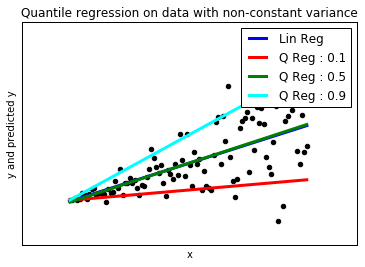

In [16]:
plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')


plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

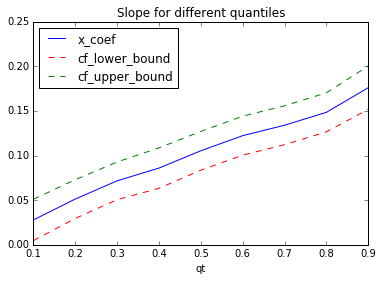

In [17]:
# Plot the changes in the quantile coefficients
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])